# The dataset was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and 4 continuous variables.

Car Name – Name of the car

Cyl – No of cylinders in the car – Multivalued discrete

Disp – Displacement – continuous

Hp – Horsepower – continuous

Wt – Weight – continuous

Acc – Accleration – continuous

Yr – Model of the car – Multivalued discrete

In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the CSV file and prepare the DF
car_data = pd.read_csv("cars-dataset.csv") 
print(car_data.shape)

(398, 8)


In [3]:
print(car_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB
None


hp which is given as a continuous variable is shown as object signifies non numeric values present

In [4]:
#store the original data
car_data_ref = car_data.copy()
car_data_ref.head()

car name  cyl   disp   hp    wt   acc  yr   mpg
0  chevrolet chevelle malibu    8  307.0  130  3504  12.0  70  18.0
1          buick skylark 320    8  350.0  165  3693  11.5  70  15.0
2         plymouth satellite    8  318.0  150  3436  11.0  70  18.0
3              amc rebel sst    8  304.0  150  3433  12.0  70  16.0
4                ford torino    8  302.0  140  3449  10.5  70  17.0

car name has brand name and model. seperating may be can help. brand and model are seperated by space in almost call cases

In [5]:
car_data[['brand_name', 'model']] = car_data['car name'].str.split(' ', n=1, expand=True).rename(columns=dict(zip([0, 1], ['brand_name', 'model'])))
car_data.head()

car name  cyl   disp   hp    wt   acc  yr   mpg  \
0  chevrolet chevelle malibu    8  307.0  130  3504  12.0  70  18.0   
1          buick skylark 320    8  350.0  165  3693  11.5  70  15.0   
2         plymouth satellite    8  318.0  150  3436  11.0  70  18.0   
3              amc rebel sst    8  304.0  150  3433  12.0  70  16.0   
4                ford torino    8  302.0  140  3449  10.5  70  17.0   

  brand_name            model  
0  chevrolet  chevelle malibu  
1      buick      skylark 320  
2   plymouth        satellite  
3        amc        rebel sst  
4       ford           torino

In [6]:
#Find the missing value.
#Get missing values isna gives true or false for every cell; total the true's which is 1 to get the null totals
pd.DataFrame((zip(car_data.columns, car_data.isna().sum(), car_data.isnull().sum())), columns=['Features', 'Count_NA', 'Count_NULL'])

Features  Count_NA  Count_NULL
0    car name         0           0
1         cyl         0           0
2        disp         0           0
3          hp         0           0
4          wt         0           0
5         acc         0           0
6          yr         0           0
7         mpg         0           0
8  brand_name         0           0
9       model         2           2

No null values found in the given feature. only found in model which is OK. Some hp data has non numeric values

In [7]:
#checking the number of unique values of other attributes
print("\nNumber of unique values of other attributes")
for cls in car_data.items():
    print(cls[0], "-", cls[1].nunique(), "values")
    if(cls[1].nunique() <= 50):
        print("    ", cls[1].unique())


Number of unique values of other attributes
car name - 305 values
cyl - 5 values
     [8 4 6 3 5]
disp - 82 values
hp - 94 values
wt - 351 values
acc - 95 values
yr - 13 values
     [70 71 72 73 74 75 76 77 78 79 80 81 82]
mpg - 129 values
brand_name - 37 values
     ['chevrolet' 'buick' 'plymouth' 'amc' 'ford' 'pontiac' 'dodge' 'toyota'
 'datsun' 'volkswagen' 'peugeot' 'audi' 'saab' 'bmw' 'chevy' 'hi'
 'mercury' 'opel' 'fiat' 'oldsmobile' 'chrysler' 'mazda' 'volvo' 'renault'
 'toyouta' 'maxda' 'honda' 'subaru' 'chevroelt' 'capri' 'vw'
 'mercedes-benz' 'cadillac' 'mercedes' 'vokswagen' 'triumph' 'nissan']
model - 299 values


In [8]:
car_data.describe(include='all')

car name         cyl        disp   hp           wt         acc  \
count          398  398.000000  398.000000  398   398.000000  398.000000   
unique         305         NaN         NaN   94          NaN         NaN   
top     ford pinto         NaN         NaN  150          NaN         NaN   
freq             6         NaN         NaN   22          NaN         NaN   
mean           NaN    5.454774  193.425879  NaN  2970.424623   15.568090   
std            NaN    1.701004  104.269838  NaN   846.841774    2.757689   
min            NaN    3.000000   68.000000  NaN  1613.000000    8.000000   
25%            NaN    4.000000  104.250000  NaN  2223.750000   13.825000   
50%            NaN    4.000000  148.500000  NaN  2803.500000   15.500000   
75%            NaN    8.000000  262.000000  NaN  3608.000000   17.175000   
max            NaN    8.000000  455.000000  NaN  5140.000000   24.800000   

                yr         mpg brand_name  model  
count   398.000000  398.000000        398    396  
unique         NaN         NaN         37    299  
top            NaN         NaN       ford  pinto  
freq           NaN         NaN         51      6  
mean     76.010050   23.514573        NaN    NaN  
std       3.697627    7.815984        NaN    NaN  
min      70.000000    9.000000        NaN    NaN  
25%      73.000000   17.500000        NaN    NaN  
50%      76.000000   23.000000        NaN    NaN  
75%      79.000000   29.000000        NaN    NaN  
max      82.000000   46.600000        NaN    NaN

# 1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

In [9]:
#finding the rows where the data is no-numeric for hp column
cars_name_hp_missing = np.array(car_data.loc[~car_data['hp'].astype(str).str.isdigit()]['car name'])
car_data[car_data['car name'].isin(cars_name_hp_missing)].sort_values('car name')

car name  cyl   disp  hp    wt   acc  yr   mpg brand_name  \
374        amc concord dl    4  151.0   ?  3035  20.5  82  23.0        amc   
17          ford maverick    6  200.0  85  2587  16.0  70  21.0       ford   
100         ford maverick    6  250.0  88  3021  16.5  73  18.0       ford   
126         ford maverick    6  200.0   ?  2875  17.0  74  21.0       ford   
155         ford maverick    6  250.0  72  3158  19.5  75  15.0       ford   
193         ford maverick    6  200.0  81  3012  17.6  76  24.0       ford   
336    ford mustang cobra    4  140.0   ?  2905  14.3  80  23.6       ford   
32             ford pinto    4   98.0   ?  2046  19.0  71  25.0       ford   
112            ford pinto    4  122.0  85  2310  18.5  73  19.0       ford   
130            ford pinto    4  122.0  80  2451  16.5  74  26.0       ford   
168            ford pinto    4  140.0  83  2639  17.0  75  23.0       ford   
174            ford pinto    6  171.0  97  2984  14.5  75  18.0       ford   
206            ford pinto    4  140.0  72  2565  13.6  76  26.5       ford   
354           renault 18i    4  100.0   ?  2320  15.8  81  34.5    renault   
330  renault lecar deluxe    4   85.0   ?  1835  17.3  80  40.9    renault   

             model  
374     concord dl  
17        maverick  
100       maverick  
126       maverick  
155       maverick  
193       maverick  
336  mustang cobra  
32           pinto  
112          pinto  
130          pinto  
168          pinto  
174          pinto  
206          pinto  
354            18i  
330   lecar deluxe

With this fix the values of the ford pinto and ford maverick missing values
ford pinto = 80 [minimum of for pinto since the number of cylinders and disp is low]
ford maverick = 81 similar cylinders and displacement leads and only 2 years prior

In [10]:
car_data['hp'].iloc[32] = 80
car_data['hp'].iloc[126] = 81
car_data.loc[~car_data['hp'].astype(str).str.isdigit()]

car name  cyl   disp hp    wt   acc  yr   mpg brand_name  \
330  renault lecar deluxe    4   85.0  ?  1835  17.3  80  40.9    renault   
336    ford mustang cobra    4  140.0  ?  2905  14.3  80  23.6       ford   
354           renault 18i    4  100.0  ?  2320  15.8  81  34.5    renault   
374        amc concord dl    4  151.0  ?  3035  20.5  82  23.0        amc   

             model  
330   lecar deluxe  
336  mustang cobra  
354            18i  
374     concord dl

In [11]:
car_data[((car_data['disp']==140) & (car_data['brand_name']=='ford'))]

car name  cyl   disp  hp    wt   acc  yr   mpg brand_name  \
168            ford pinto    4  140.0  83  2639  17.0  75  23.0       ford   
206            ford pinto    4  140.0  72  2565  13.6  76  26.5       ford   
236   ford mustang ii 2+2    4  140.0  89  2755  15.8  77  25.5       ford   
255   ford fairmont (man)    4  140.0  88  2720  15.4  78  25.1       ford   
282       ford fairmont 4    4  140.0  88  2890  17.3  79  22.3       ford   
314         ford fairmont    4  140.0  88  2870  18.1  80  26.4       ford   
336    ford mustang cobra    4  140.0   ?  2905  14.3  80  23.6       ford   
373  ford fairmont futura    4  140.0  92  2865  16.4  82  24.0       ford   
393       ford mustang gl    4  140.0  86  2790  15.6  82  27.0       ford   

               model  
168            pinto  
206            pinto  
236   mustang ii 2+2  
255   fairmont (man)  
282       fairmont 4  
314         fairmont  
336    mustang cobra  
373  fairmont futura  
393       mustang gl

using 86 hp based on other ford mustang for the missing value based on similar ford mustang

In [12]:
car_data['hp'].iloc[336] = 86
car_data.loc[~car_data['hp'].astype(str).str.isdigit()]

car name  cyl   disp hp    wt   acc  yr   mpg brand_name  \
330  renault lecar deluxe    4   85.0  ?  1835  17.3  80  40.9    renault   
354           renault 18i    4  100.0  ?  2320  15.8  81  34.5    renault   
374        amc concord dl    4  151.0  ?  3035  20.5  82  23.0        amc   

            model  
330  lecar deluxe  
354           18i  
374    concord dl

In [13]:
car_data[((car_data['cyl']==4) & (car_data['brand_name']=='renault'))]

car name  cyl   disp  hp    wt   acc  yr   mpg brand_name  \
79        renault 12 (sw)    4   96.0  69  2189  18.0  72  26.0    renault   
186          renault 12tl    4  101.0  83  2202  15.3  76  27.0    renault   
218         renault 5 gtl    4   79.0  58  1825  18.6  77  36.0    renault   
330  renault lecar deluxe    4   85.0   ?  1835  17.3  80  40.9    renault   
354           renault 18i    4  100.0   ?  2320  15.8  81  34.5    renault   

            model  
79        12 (sw)  
186          12tl  
218         5 gtl  
330  lecar deluxe  
354           18i

58, 83 hp for the 330 and 354 rows for hp based on similar renault cars

In [14]:
car_data['hp'].iloc[330] = 58
car_data['hp'].iloc[354] = 83
car_data.loc[~car_data['hp'].astype(str).str.isdigit()]

car name  cyl   disp hp    wt   acc  yr   mpg brand_name  \
374  amc concord dl    4  151.0  ?  3035  20.5  82  23.0        amc   

          model  
374  concord dl

In [15]:
car_data[((car_data['cyl']==4) & (car_data['brand_name']=='amc'))]

car name  cyl   disp  hp    wt   acc  yr   mpg brand_name  \
296   amc spirit dl    4  121.0  80  2670  15.0  79  27.4        amc   
315     amc concord    4  151.0  90  3003  20.1  80  24.3        amc   
374  amc concord dl    4  151.0   ?  3035  20.5  82  23.0        amc   

          model  
296   spirit dl  
315     concord  
374  concord dl

90hp for row 374 based on similar amc car

In [16]:
car_data['hp'].iloc[374] = 90
car_data.loc[~car_data['hp'].astype(str).str.isdigit()]

Empty DataFrame
Columns: [car name, cyl, disp, hp, wt, acc, yr, mpg, brand_name, model]
Index: []

In [17]:
car_data['hp'] = car_data['hp'].apply(pd.to_numeric)
car_data.dtypes

car name       object
cyl             int64
disp          float64
hp              int64
wt              int64
acc           float64
yr              int64
mpg           float64
brand_name     object
model          object
dtype: object

In [18]:
car_data.describe()

cyl        disp          hp           wt         acc  \
count  398.000000  398.000000  398.000000   398.000000  398.000000   
mean     5.454774  193.425879  104.095477  2970.424623   15.568090   
std      1.701004  104.269838   38.339540   846.841774    2.757689   
min      3.000000   68.000000   46.000000  1613.000000    8.000000   
25%      4.000000  104.250000   75.250000  2223.750000   13.825000   
50%      4.000000  148.500000   92.000000  2803.500000   15.500000   
75%      8.000000  262.000000  125.000000  3608.000000   17.175000   
max      8.000000  455.000000  230.000000  5140.000000   24.800000   

               yr         mpg  
count  398.000000  398.000000  
mean    76.010050   23.514573  
std      3.697627    7.815984  
min     70.000000    9.000000  
25%     73.000000   17.500000  
50%     76.000000   23.000000  
75%     79.000000   29.000000  
max     82.000000   46.600000

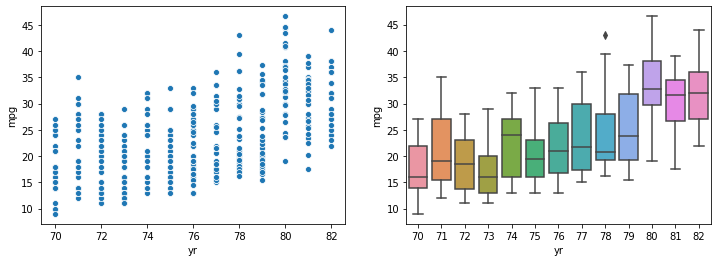

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.scatterplot('yr', 'mpg', data=car_data, ax=ax1)
sns.boxplot(x='yr', y='mpg', data=car_data, ax=ax2)
plt.show()

Seems that there is a focus on mpg by companies especially in the 80's my due to rising fuel prices.

In [20]:
#drop columns that are not relavant for analysis
dropColumns = ['car name', 'brand_name', 'model']
car_data.drop(dropColumns, axis=1, inplace=True)

In [21]:
car_data.head(2)

cyl   disp   hp    wt   acc  yr   mpg
0    8  307.0  130  3504  12.0  70  18.0
1    8  350.0  165  3693  11.5  70  15.0

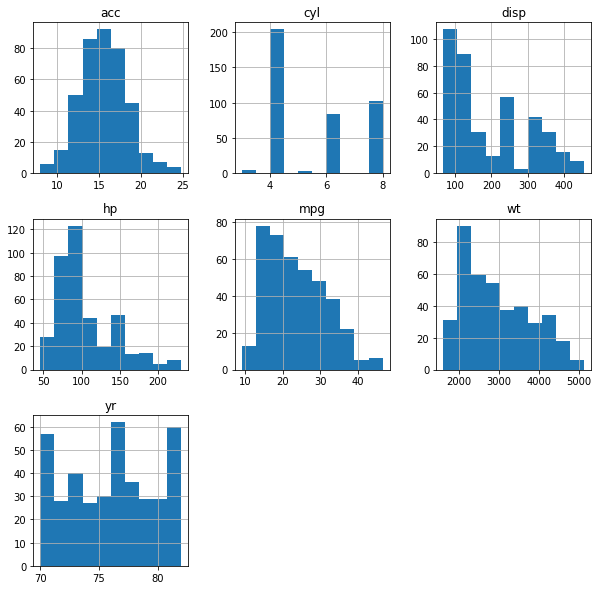

In [22]:
car_data.hist(figsize=(10,10))
plt.show()

3 and 5 cylinder cars are represented with very low counts. But both cylinders are valid and hence not treating the data

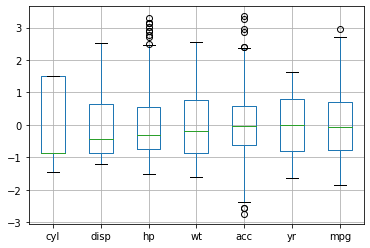

In [23]:
#Check for outliers and see if it valid or requires treatment
from scipy.stats import zscore
car_data.apply(zscore).boxplot()
plt.show()

In [24]:
car_data.sort_values('hp', ascending=False).head(10)

cyl   disp   hp    wt   acc  yr   mpg
116    8  400.0  230  4278   9.5  73  16.0
95     8  455.0  225  4951  11.0  73  12.0
13     8  455.0  225  3086  10.0  70  14.0
8      8  455.0  225  4425  10.0  70  14.0
6      8  454.0  220  4354   9.0  70  14.0
7      8  440.0  215  4312   8.5  70  14.0
25     8  360.0  215  4615  14.0  70  10.0
94     8  440.0  215  4735  11.0  73  13.0
27     8  318.0  210  4382  13.5  70  11.0
67     8  429.0  208  4633  11.0  72  11.0

In [25]:
car_data.sort_values('acc', ascending=True).head(5).append(car_data.sort_values('acc', ascending=True).tail(10))

cyl   disp   hp    wt   acc  yr   mpg
11     8  340.0  160  3609   8.0  70  14.0
9      8  390.0  190  3850   8.5  70  15.0
7      8  440.0  215  4312   8.5  70  14.0
6      8  454.0  220  4354   9.0  70  14.0
116    8  400.0  230  4278   9.5  73  16.0
325    4   90.0   48  2085  21.7  80  44.3
328    4  146.0   67  3250  21.8  80  30.0
209    4  120.0   88  3270  21.9  76  19.0
196    4   98.0   60  2164  22.1  76  24.5
195    4   85.0   52  2035  22.2  76  29.0
300    8  260.0   90  3420  22.2  79  23.9
59     4   97.0   54  2254  23.5  72  23.0
326    4   90.0   48  2335  23.7  80  43.4
394    4   97.0   52  2130  24.6  82  44.0
299    4  141.0   71  3190  24.8  79  27.2

No abnormal values found in outliers of hp or acc found in the box plot. No treatment required

# 2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

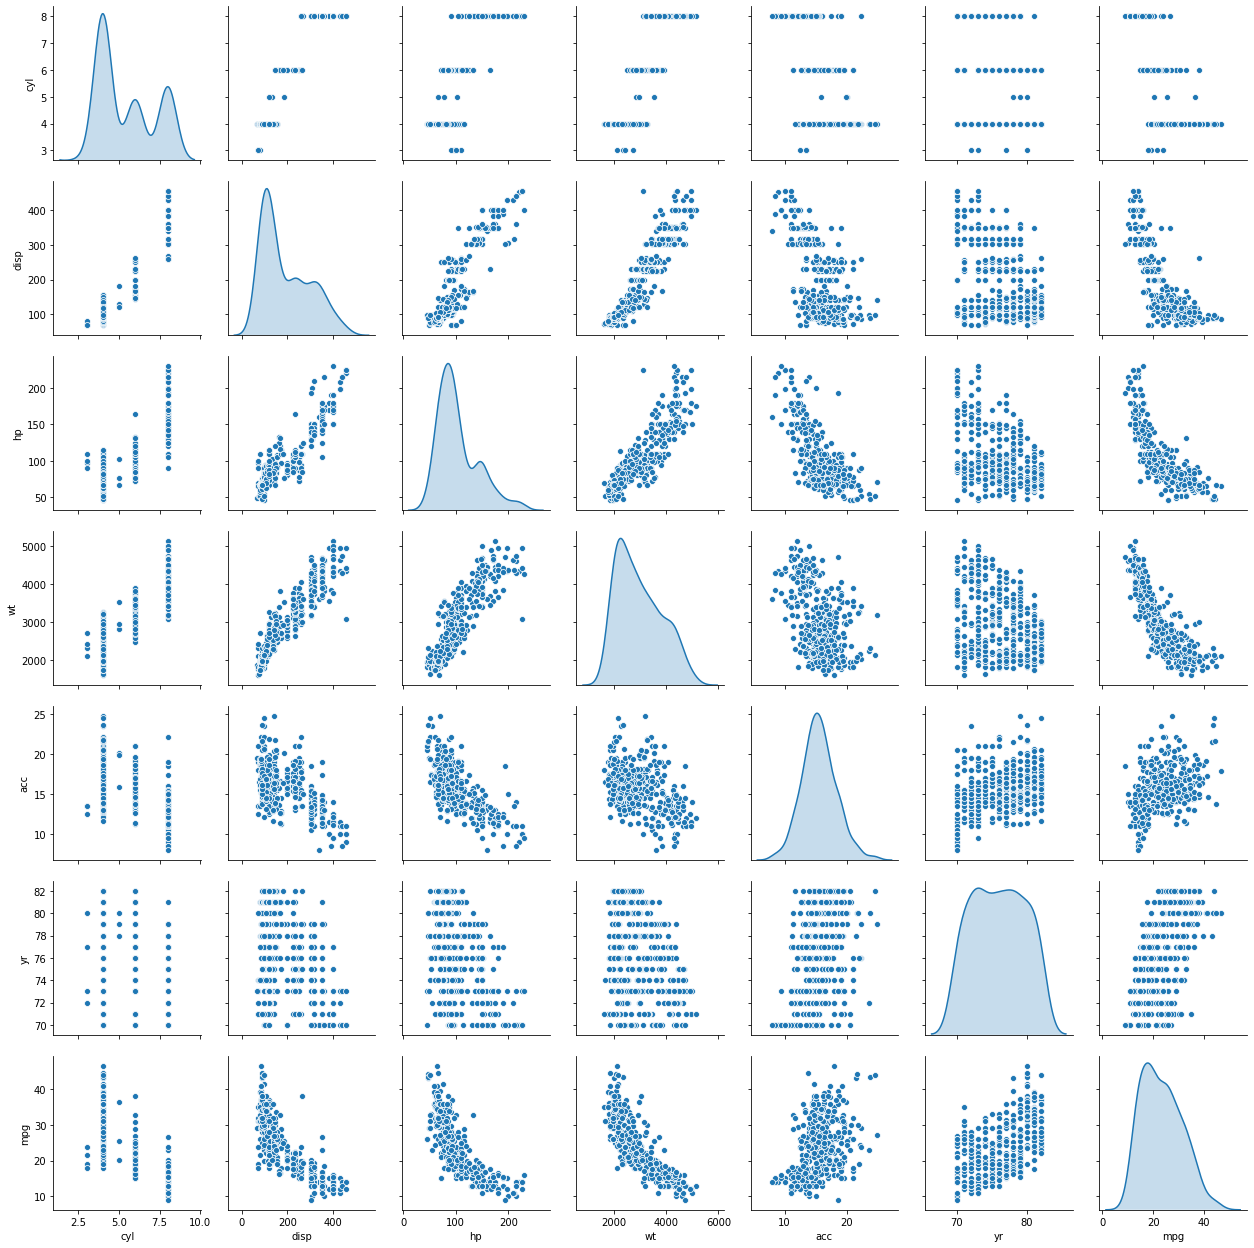

In [26]:
sns.pairplot(car_data, diag_kind='kde')
plt.show()

Clusters thought of based on the diagonal KDE plot
1. 3 clusters seen in based on the number of cylinders
2. 2 to 3 clusters seen from the displacement, hp
3. 1 strong cluster and 1 hidden cluster seen from weight
4. uniform distribution seen in weight. no cluster seen
5. year column distribution not revealing any cluster
6. displacement per cylinder created also reveals 2 clusters

Relationship seen between target variable [mpg] and other independent variables
1. HP, Displacement, Weight are strongly correlating with MPG. As HP or displacement or weight increases, MPG decreases.
2. No real correlation seen between acc and MPG.
3. Average MPG has increased over the years. Not clearly giving any insights

# 3. Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

In [27]:
from scipy.stats import zscore
car_data_z = car_data.drop('mpg', axis=1).apply(zscore)

In [28]:
from sklearn.cluster import KMeans
cluster_error = []
cluster_range = range(2, 10)   
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 10, random_state=5)
  clusters.fit(car_data_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_error.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(car_data_z, labels, metric='euclidean'))

In [29]:
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_error , "Avg Sil Score": cluster_sil_scores } )
clusters_df

num_clusters  cluster_errors  Avg Sil Score
0             2     1067.886021       0.505366
1             3      806.820693       0.357606
2             4      639.608390       0.350508
3             5      562.408741       0.336929
4             6      493.852820       0.303038
5             7      448.670250       0.283976
6             8      405.711327       0.277606
7             9      374.565589       0.292718

<function matplotlib.pyplot.show(*args, **kw)>

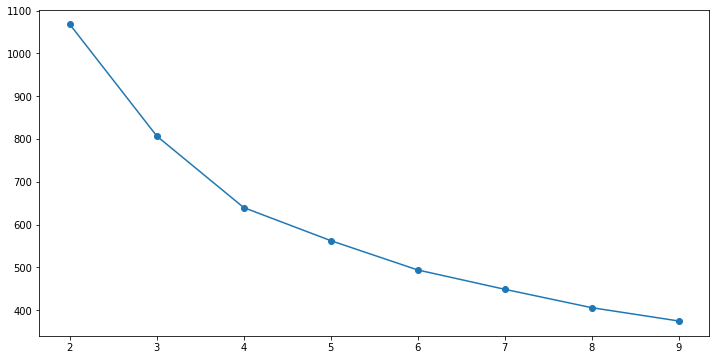

In [30]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show

3 to 4 clusters seens based on slope of elbow plot

First try with 3 clusters

In [31]:
kmeans = KMeans(n_clusters=3, n_init =10, random_state=5)
kmeans.fit(car_data_z)
car_data['category_km3'] = kmeans.labels_
car_data['category_km3'].value_counts()

0    210
1     95
2     93
Name: category_km3, dtype: int64

In [32]:
centroid_df = pd.DataFrame(kmeans.cluster_centers_, columns = car_data_z.columns )
centroid_df

cyl      disp        hp        wt       acc        yr
0 -0.861927 -0.808396 -0.661352 -0.774476  0.356511  0.284826
1  1.498191  1.500684  1.514958  1.400016 -1.076122 -0.672556
2  0.415875  0.292454 -0.054163  0.318693  0.294241  0.043865

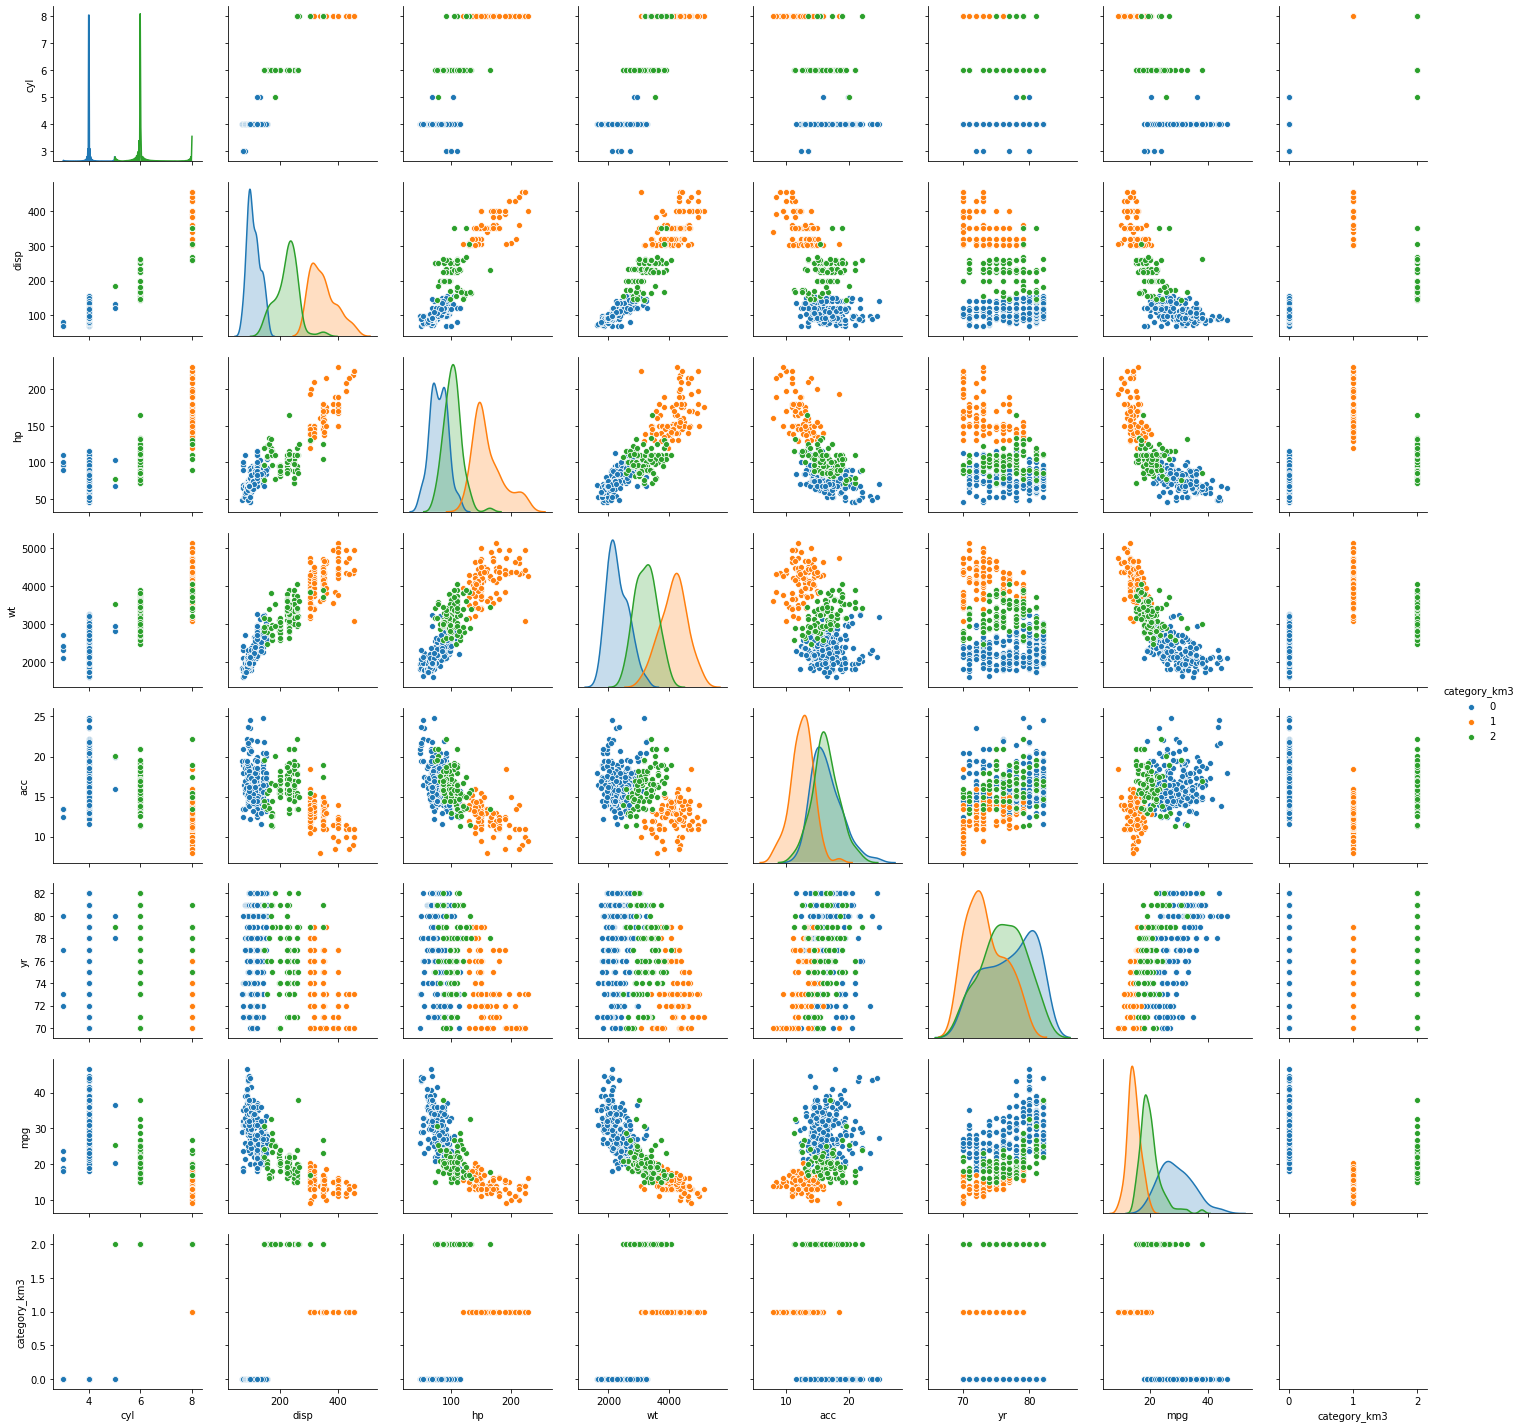

In [33]:
sns.pairplot(car_data[['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg', 'category_km3']], diag_kind='kde', hue='category_km3')
plt.show()

Now try with 4 clusters

In [34]:
kmeans = KMeans(n_clusters=4, n_init =10, random_state=5)
kmeans.fit(car_data_z)
car_data['category_km4'] = kmeans.labels_
car_data['category_km4'].value_counts()

3    122
2     94
1     94
0     88
Name: category_km4, dtype: int64

In [35]:
centroid_df = pd.DataFrame(kmeans.cluster_centers_, columns = car_data_z.columns )
centroid_df

cyl      disp        hp        wt       acc        yr
0  0.434648  0.329709 -0.025938  0.366468  0.300398  0.123439
1 -0.806225 -0.800235 -0.592316 -0.790572  0.349944 -0.786267
2  1.498191  1.503923  1.522489  1.404098 -1.086149 -0.688324
3 -0.846671 -0.780009 -0.697981 -0.737054  0.350559  1.047122

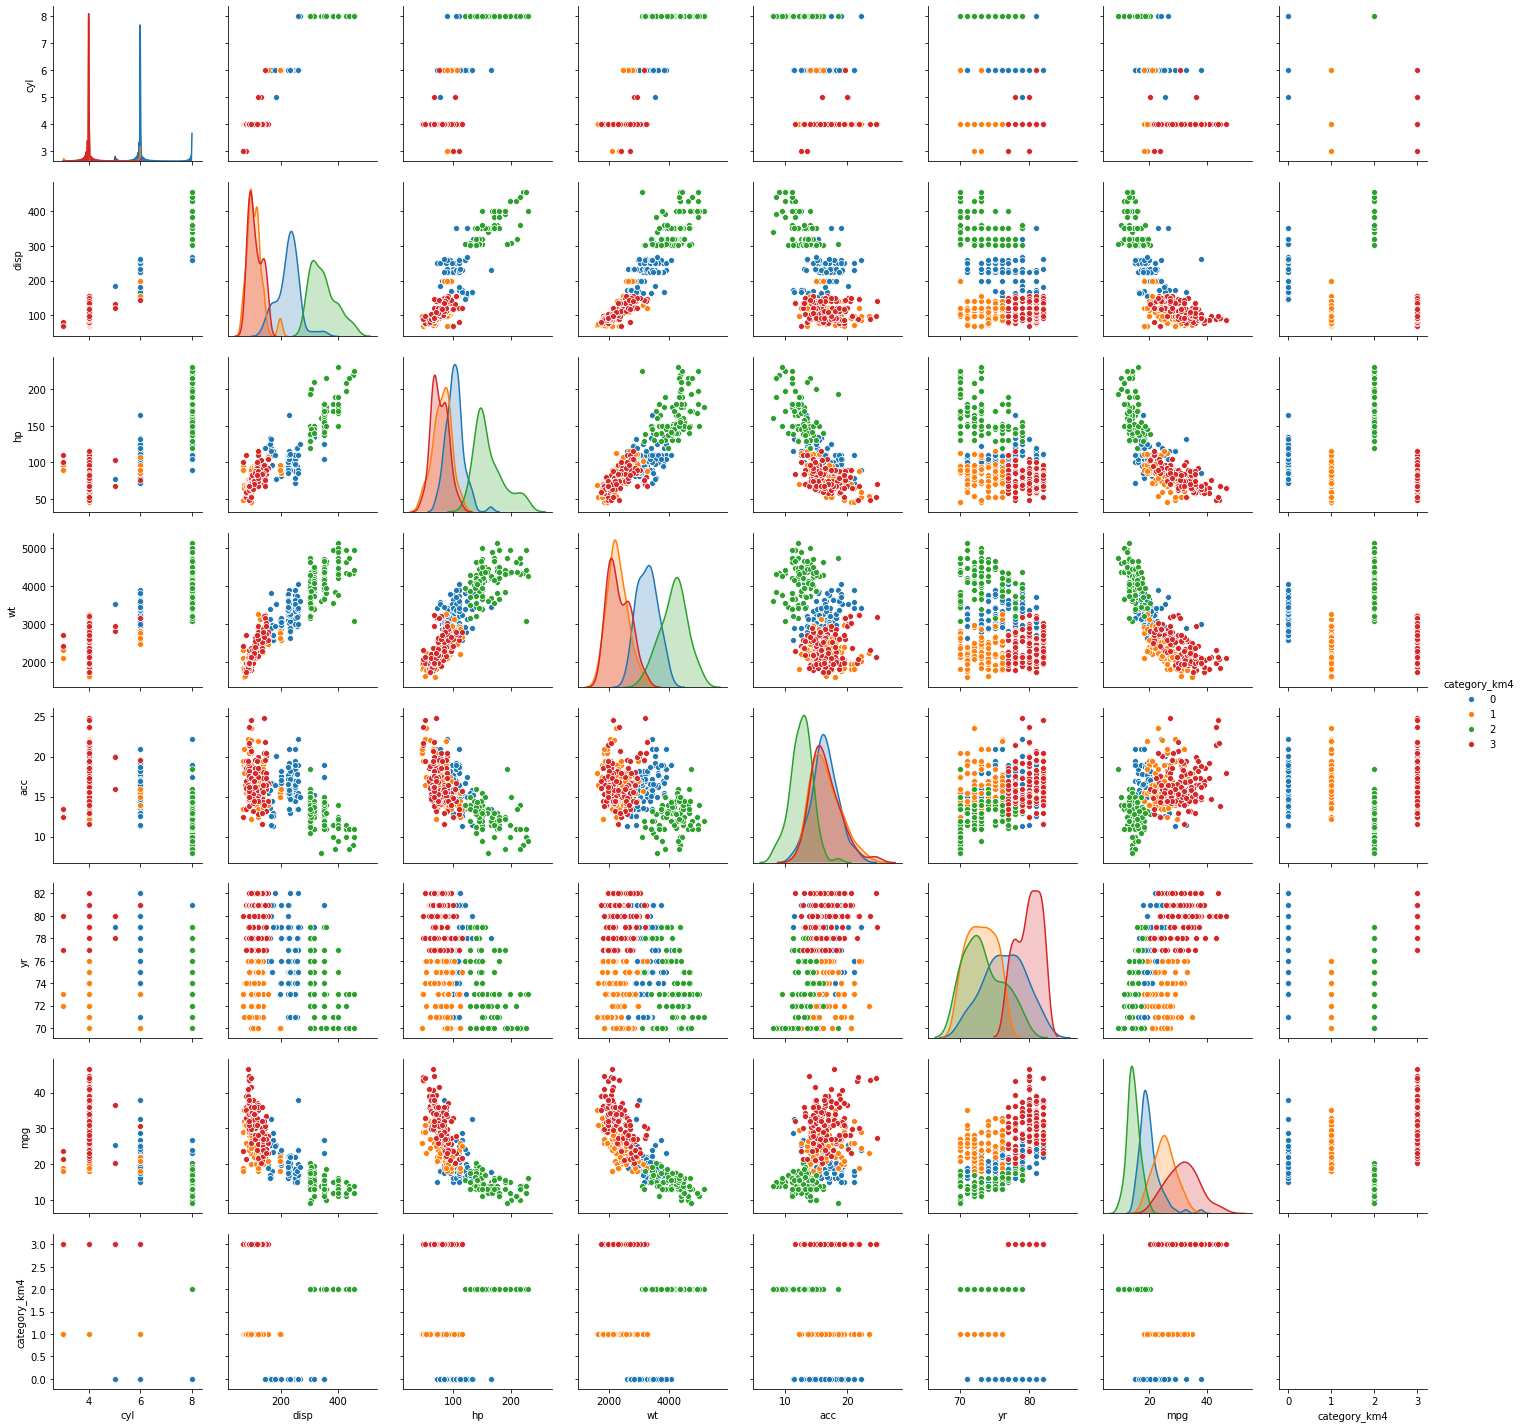

In [36]:
sns.pairplot(car_data[['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg', 'category_km4']], diag_kind='kde', hue='category_km4')
plt.show()

View in dendogram the hirearchical clustering to see how clusters are seen

In [37]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [38]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
Z = linkage(car_data_z, method='ward', metric='euclidean')
c, coph_dists = cophenet(Z , pdist(car_data_z))
print(c)
print(Z)

0.7936637551141238
[[2.66000000e+02 2.79000000e+02 4.33294148e-02 2.00000000e+00]
 [3.53000000e+02 3.55000000e+02 8.29643714e-02 2.00000000e+00]
 [1.50000000e+01 1.60000000e+01 8.76728190e-02 2.00000000e+00]
 ...
 [7.89000000e+02 7.90000000e+02 1.79213679e+01 2.12000000e+02]
 [7.88000000e+02 7.92000000e+02 2.28077401e+01 2.98000000e+02]
 [7.91000000e+02 7.93000000e+02 5.12064033e+01 3.98000000e+02]]


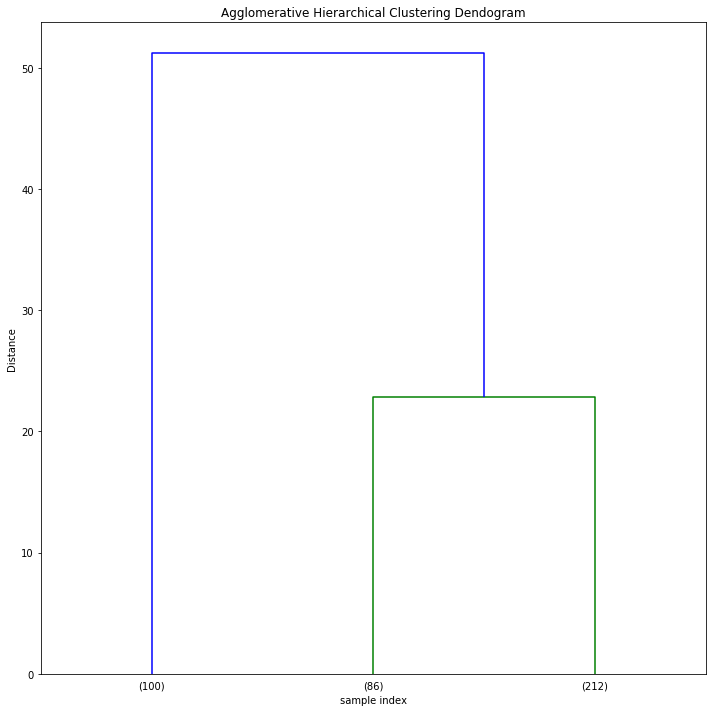

In [39]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=0., truncate_mode="lastp", p=3, leaf_font_size=10.)
plt.tight_layout()

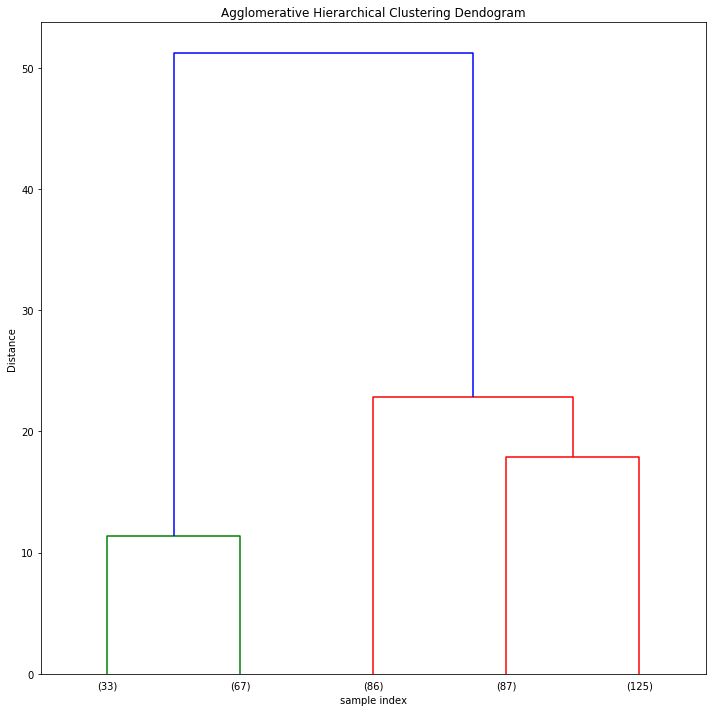

In [40]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=0., truncate_mode="lastp", p=5, leaf_font_size=10.)
plt.tight_layout()

In [41]:
from scipy.cluster.hierarchy import fcluster
#15 is used based on the above Dendogram where 25 cleary 3 cluster which is what we want as labeled target variable
clusters = fcluster(Z, t=20, criterion='distance')
car_data["category_hi3"] = clusters-1 #subtracting 1 because fcluster is 1 based [1 - 3] but we want [0 - 2]

In [42]:
from scipy.cluster.hierarchy import fcluster
#15 is used based on the above Dendogram where 15 cleary 4 cluster which is what we want as labeled target variable
clusters = fcluster(Z, t=15, criterion='distance')
car_data["category_hi4"] = clusters-1 #subtracting 1 because fcluster is 1 based [1 - 4] but we want [0 - 3]

In [43]:
print("hi 3\n", car_data["category_hi3"].value_counts())
print("hi 4\n", car_data["category_hi4"].value_counts())
print("km 3\n", car_data["category_km3"].value_counts())
print("km 4\n", car_data["category_km4"].value_counts())

hi 3
 2    212
0    100
1     86
Name: category_hi3, dtype: int64
hi 4
 3    125
0    100
2     87
1     86
Name: category_hi4, dtype: int64
km 3
 0    210
1     95
2     93
Name: category_km3, dtype: int64
km 4
 3    122
2     94
1     94
0     88
Name: category_km4, dtype: int64


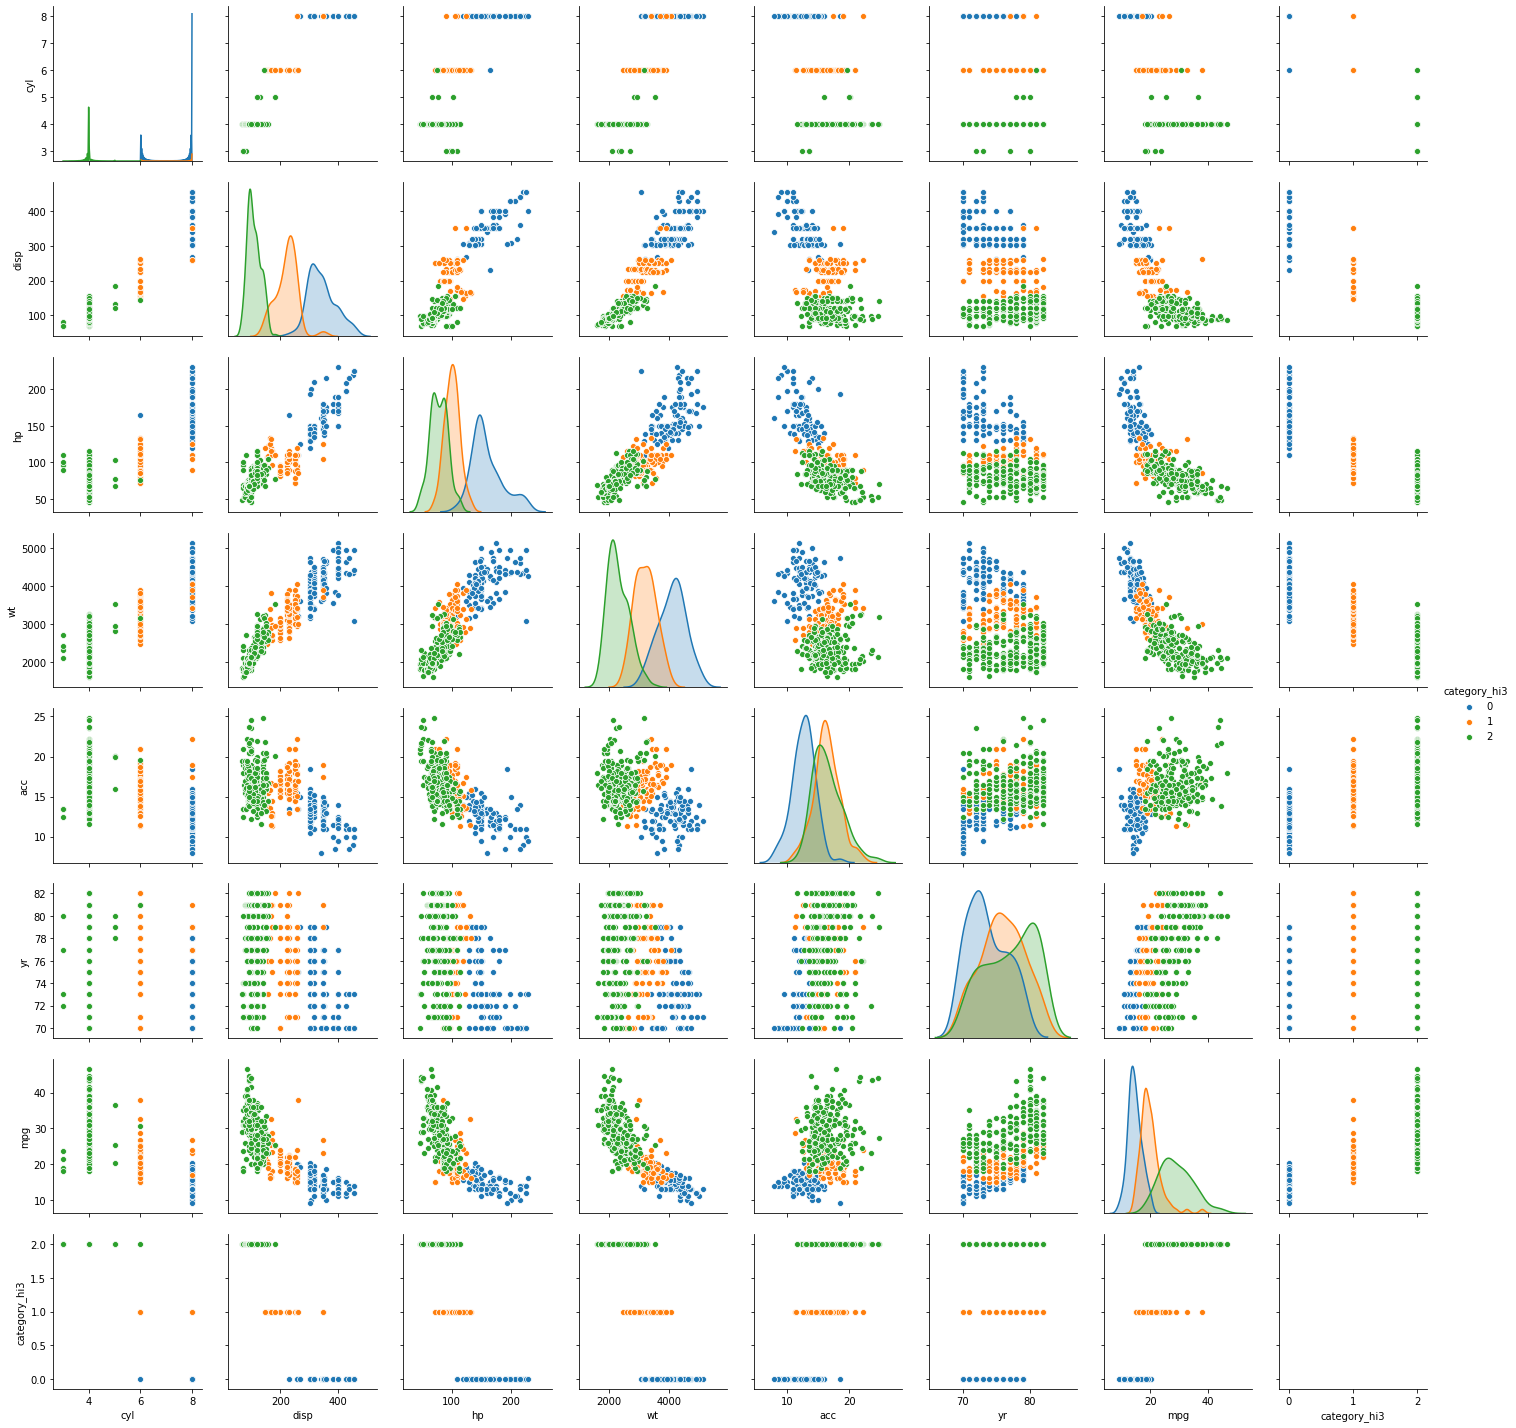

In [44]:
sns.pairplot(car_data[['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg', 'category_hi3']], diag_kind='kde', hue='category_hi3')
plt.show()

# 4. Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [45]:
car_data.dtypes

cyl               int64
disp            float64
hp                int64
wt                int64
acc             float64
yr                int64
mpg             float64
category_km3      int32
category_km4      int32
category_hi3      int32
category_hi4      int32
dtype: object

In [46]:
#Check if there is significant difference between model prediction and actual mpg to evaluate if this clustering is OK
from scipy.stats import ttest_ind

def compare_actual_and_predicted(print_str, y_test, y_pred):
    tstat, pval = ttest_ind(y_test, y_pred) 
    print(print_str, "P Values & T Statistic", pval, tstat)
    if pval < 0.05:
        print("Alternate Hypothesis : There is a significant difference between predicted mpg & actual mpg")
    else:
        print("Null Hypothesis : There is no significant difference between predicted mpg & actual mpg")

In [47]:
dict_models = {}

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
i = 0
columns = ['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg']
result = pd.DataFrame((zip(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr'])), columns=['Features'])
models = []
while i < 3:
    car_data_cluster = car_data[car_data['category_km3']==i][columns]
    X = car_data_cluster.drop(['mpg'], axis=1)
    y = car_data_cluster['mpg']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    compare_actual_and_predicted('category_km3', y_test, regression_model.predict(X_test))
    print('Score - ', i, ':', regression_model.score(X_test, y_test))
    result['Category_'+str(i)] = regression_model.coef_
    models.insert(i, regression_model)
    i = i + 1
dict_models['category_km3'] = models
result

category_km3 P Values & T Statistic 0.8898582459948141 0.13876844263111646
Null Hypothesis : There is no significant difference between predicted mpg & actual mpg
Score -  0 : 0.6588350630078308
category_km3 P Values & T Statistic 0.9088002696544485 -0.11507124665430536
Null Hypothesis : There is no significant difference between predicted mpg & actual mpg
Score -  1 : 0.5397304872056335
category_km3 P Values & T Statistic 0.5699600628918431 -0.5716068876224646
Null Hypothesis : There is no significant difference between predicted mpg & actual mpg
Score -  2 : 0.35411484409683347


Features  Category_0  Category_1  Category_2
0      cyl    8.377964    0.000000    0.403625
1     disp   -0.065425   -0.006592    0.009989
2       hp   -0.076820   -0.021228   -0.023308
3       wt   -0.003678   -0.000891   -0.005097
4      acc   -0.222110   -0.521587   -0.114620
5       yr    0.841496    0.426144    0.799431

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
i = 0
columns = ['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg']
result = pd.DataFrame((zip(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr'])), columns=['Features'])
models = []
while i < 4:
    car_data_cluster = car_data[car_data['category_km4']==i][columns]
    X = car_data_cluster.drop(['mpg'], axis=1)
    y = car_data_cluster['mpg']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    compare_actual_and_predicted('category_km4', y_test, regression_model.predict(X_test))
    print('Score - ', i, ':', regression_model.score(X_test, y_test))
    result['Category_'+str(i)] = regression_model.coef_
    models.insert(i, regression_model)
    i = i + 1
dict_models['category_km4'] = models
result

category_km4 P Values & T Statistic 0.6358778753667614 -0.4762690003943945
Null Hypothesis : There is no significant difference between predicted mpg & actual mpg
Score -  0 : 0.23400982330969355
category_km4 P Values & T Statistic 0.67983925560655 -0.4148465592537767
Null Hypothesis : There is no significant difference between predicted mpg & actual mpg
Score -  1 : 0.5054588388772461
category_km4 P Values & T Statistic 0.9874458823117753 0.015805318431545094
Null Hypothesis : There is no significant difference between predicted mpg & actual mpg
Score -  2 : 0.5559741105510949
category_km4 P Values & T Statistic 0.8065567577026491 0.24577359031251958
Null Hypothesis : There is no significant difference between predicted mpg & actual mpg
Score -  3 : 0.7053695764547124


Features  Category_0  Category_1  Category_2  Category_3
0      cyl   -0.005779    2.359458    0.000000    0.857666
1     disp    0.014452   -0.048463   -0.009692    0.000787
2       hp   -0.060169   -0.033421   -0.022161   -0.167023
3       wt   -0.005121   -0.006170   -0.000577   -0.006367
4      acc   -0.197439   -0.321135   -0.590452    0.088510
5       yr    0.791594    0.306119    0.407717    0.895993

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
i = 0
columns = ['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg']
models = []
result = pd.DataFrame((zip(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr'])), columns=['Features'])
while i < 3:
    car_data_cluster = car_data[car_data['category_hi3']==i][columns]
    X = car_data_cluster.drop(['mpg'], axis=1)
    y = car_data_cluster['mpg']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    compare_actual_and_predicted('category_hi3', y_test, regression_model.predict(X_test))
    print('Score - ', i, ':', regression_model.score(X_test, y_test))
    result['Category_'+str(i)] = regression_model.coef_
    models.insert(i, regression_model)
    i = i + 1
dict_models['category_hi3'] = models
result

category_hi3 P Values & T Statistic 0.6367000421100732 0.47481761970082037
Null Hypothesis : There is no significant difference between predicted mpg & actual mpg
Score -  0 : 0.4609312190604644
category_hi3 P Values & T Statistic 0.7884901173025609 0.2697142809244308
Null Hypothesis : There is no significant difference between predicted mpg & actual mpg
Score -  1 : 0.06198038374371895
category_hi3 P Values & T Statistic 0.9847984106189063 -0.019091375203925395
Null Hypothesis : There is no significant difference between predicted mpg & actual mpg
Score -  2 : 0.7254606175366882


Features  Category_0  Category_1  Category_2
0      cyl   -0.002488    1.351812    3.208512
1     disp   -0.011197    0.028490   -0.035766
2       hp   -0.029192    0.001013   -0.070937
3       wt   -0.000681   -0.006579   -0.006486
4      acc   -0.522462   -0.302825    0.001579
5       yr    0.434683    0.764303    0.901035

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
i = 0
columns = ['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg']
result = pd.DataFrame((zip(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr'])), columns=['Features'])
models = []
while i < 4:
    car_data_cluster = car_data[car_data['category_hi4']==i][columns]
    X = car_data_cluster.drop(['mpg'], axis=1)
    y = car_data_cluster['mpg']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    compare_actual_and_predicted('category_hi4', y_test, regression_model.predict(X_test))
    print('Score - ', i, ':', regression_model.score(X_test, y_test))
    result['Category_'+str(i)] = regression_model.coef_
    models.insert(i, regression_model)
    i = i + 1
dict_models['category_hi4'] = models
result

category_hi4 P Values & T Statistic 0.6367000421100732 0.47481761970082037
Null Hypothesis : There is no significant difference between predicted mpg & actual mpg
Score -  0 : 0.4609312190604644
category_hi4 P Values & T Statistic 0.7884901173025609 0.2697142809244308
Null Hypothesis : There is no significant difference between predicted mpg & actual mpg
Score -  1 : 0.06198038374371895
category_hi4 P Values & T Statistic 0.7718574357143209 -0.2914621303140227
Null Hypothesis : There is no significant difference between predicted mpg & actual mpg
Score -  2 : 0.524931757414224
category_hi4 P Values & T Statistic 0.29538533096125197 1.0538392707530704
Null Hypothesis : There is no significant difference between predicted mpg & actual mpg
Score -  3 : 0.6607063986939228


Features  Category_0  Category_1  Category_2  Category_3
0      cyl   -0.002488    1.351812   10.872733    2.058744
1     disp   -0.011197    0.028490   -0.085363   -0.006883
2       hp   -0.029192    0.001013   -0.029534   -0.163646
3       wt   -0.000681   -0.006579   -0.004097   -0.005903
4      acc   -0.522462   -0.302825   -0.298870   -0.003064
5       yr    0.434683    0.764303    0.389842    1.022940

In [52]:
dict_models
def print_mpg(model_type, loc_value):
    columns = ['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg', model_type]
    x_data = car_data[columns].drop(['mpg', model_type], axis=1).iloc[loc_value]
    model = dict_models[model_type][car_data[model_type].iloc[loc_value]]
    y_test_value = car_data['mpg'].iloc[loc_value]
    y_pred_value = model.predict(np.array([x_data], ndmin=2)) 
    print("Actual value:", y_test_value, "Predicted Value:", y_pred_value[0])

def print_mpg_all_models(row_index):
    print("Row index:", row_index)
    print('category_km3')
    print_mpg('category_km3', row_index)
    print('category_km4')
    print_mpg('category_km4', row_index)
    print('category_hi3')
    print_mpg('category_hi3', row_index)
    print('category_hi4')
    print_mpg('category_hi4', row_index)

In [53]:
#Just check for 5 random values how the prediction works with linear regression but with different clusters
i = 0
while i < 5:
    some_rand_row = np.random.randint(0, car_data.count()['cyl'])
    print_mpg_all_models(some_rand_row)
    i = i + 1

Row index: 278
category_km3
Actual value: 31.5 Predicted Value: 33.42224745438531
category_km4
Actual value: 31.5 Predicted Value: 33.13414463252782
category_hi3
Actual value: 31.5 Predicted Value: 33.375283126104094
category_hi4
Actual value: 31.5 Predicted Value: 32.52016963936292
Row index: 299
category_km3
Actual value: 27.2 Predicted Value: 24.248785577553498
category_km4
Actual value: 27.2 Predicted Value: 27.307434996241447
category_hi3
Actual value: 27.2 Predicted Value: 24.64862301120137
category_hi4
Actual value: 27.2 Predicted Value: 26.07153118190478
Row index: 270
category_km3
Actual value: 21.1 Predicted Value: 26.725544922883067
category_km4
Actual value: 21.1 Predicted Value: 25.80971509109795
category_hi3
Actual value: 21.1 Predicted Value: 26.65788631142482
category_hi4
Actual value: 21.1 Predicted Value: 25.18429290231937
Row index: 22
category_km3
Actual value: 25.0 Predicted Value: 21.871590646957976
category_km4
Actual value: 25.0 Predicted Value: 23.2970949402297

Amongst the 4 models, hirearchical clustering with 4 clusters seem to work well in multiple situations. However all the models did reveal that there is not significant difference based on the statistical comparison done between predicted vs. actual.